<a href="https://colab.research.google.com/github/jabarcmun/RNN/blob/main/Precio_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carga CSV Bitcoin, invierte orden (antiguo→reciente) y muestra 5 filas
import pandas as pd

_df = pd.read_csv("https://gist.githubusercontent.com/mevangelista-alvarado/6f4f28c00f9e683108637cb3c8d5db89/raw/1ce753283fce23eeab952fa1d660a7069bbe9104/Bitcoin_1_1_2024-6_9_2024_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
# muestra primeras 5 filas para ver resultado
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
158,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T09:40:00.000Z,2024-01-03T12:10:00.000Z,2781,44961.603187,45503.241795,40813.534868,42848.175641,4.634232e+10,8.393459e+11,2024-01-03T23:59:59.999Z
157,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:22:00.000Z,2024-01-04T01:26:00.000Z,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,8.654825e+11,2024-01-04T23:59:59.999Z
156,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T23:07:00.000Z,2024-01-05T01:49:00.000Z,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,8.651827e+11,2024-01-05T23:59:59.999Z
155,2024-01-06T00:00:00.000Z,2024-01-06T23:59:59.999Z,2024-01-06T00:10:00.000Z,2024-01-06T07:07:00.000Z,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,8.618220e+11,2024-01-06T23:59:59.999Z
154,2024-01-07T00:00:00.000Z,2024-01-07T23:59:59.999Z,2024-01-07T14:09:00.000Z,2024-01-07T23:45:00.000Z,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,8.609518e+11,2024-01-07T23:59:59.999Z


In [ ]:
'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [ ]:
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]

In [ ]:
# Extrae close 2D
dates = df[['close']].values

In [ ]:
# Importa el escalador
from sklearn.preprocessing import MinMaxScaler

# Instancia que comprime valores al intervalo 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Calcula min/max de 'dates', aplica la escala y devuelve array normalizado
scaled_data = scaler.fit_transform(dates)

In [ ]:
# Define tamaño ventana
window_size = 60

In [ ]:
import numpy as np
# Crea ventana, siguiente valor para entrenar
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

In [ ]:
split = int(len(X) * 0.8)      # 80 % para entrenar
X_train, y_train = X[:split], y[:split]  # datos de entrenamiento
X_test, y_test = X[split:], y[split:]    # datos de prueba

In [ ]:
from tensorflow.keras.models import Sequential  # Importa tensorflow
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN  # Capas recurrentes y densa

model = Sequential()  # Red lineal
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))  # 120 neuronas, mantiene secuencia
model.add(SimpleRNN(units=60, return_sequences=False))  # 60 neuronas, devuelve solo último paso
model.add(Dense(units=30))  # 30 Capas densa intermedia
model.add(Dense(units=1))  # Salida: predicción de 1 valor

In [ ]:
from tensorflow.keras.optimizers import Adam  # Importa optimizador Adam

learning_rate = 0.001  # Tasa de aprendizaje
adam_optimizer = Adam(learning_rate=learning_rate)  # Crea optimizador con lr fijo

model.compile(optimizer=adam_optimizer, loss='mean_squared_error')  # Configura pérdida MSE

model.fit(X_train, y_train, batch_size=1, epochs=10)  # Entrena 10 épocas, batch tamaño 1

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1045
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0312
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0112
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0195
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0150
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0094


In [ ]:
# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [ ]:
predictions = model.predict(X_test)  # Predice conjunto de prueba

# Reconvierte predicciones a escala original
predictions = scaler.inverse_transform(np.hstack([predictions.reshape(-1,1), np.zeros((len(predictions),3))]))[:,0]

# Reconvierte a escala original
y_test = scaler.inverse_transform(np.hstack([y_test.reshape(-1,1), np.zeros((len(y_test),3))]))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Métricas de error

mae = mean_absolute_error(y_test, predictions)  # Error medio absoluto
rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Raíz de error cuadrático

print(f"MAE: {mae}")  # Prom real
print(f"RMSE: {rmse}")  #Prom real al cuadrado

MAE: 2535.0890503114697
RMSE: 2837.214239144296


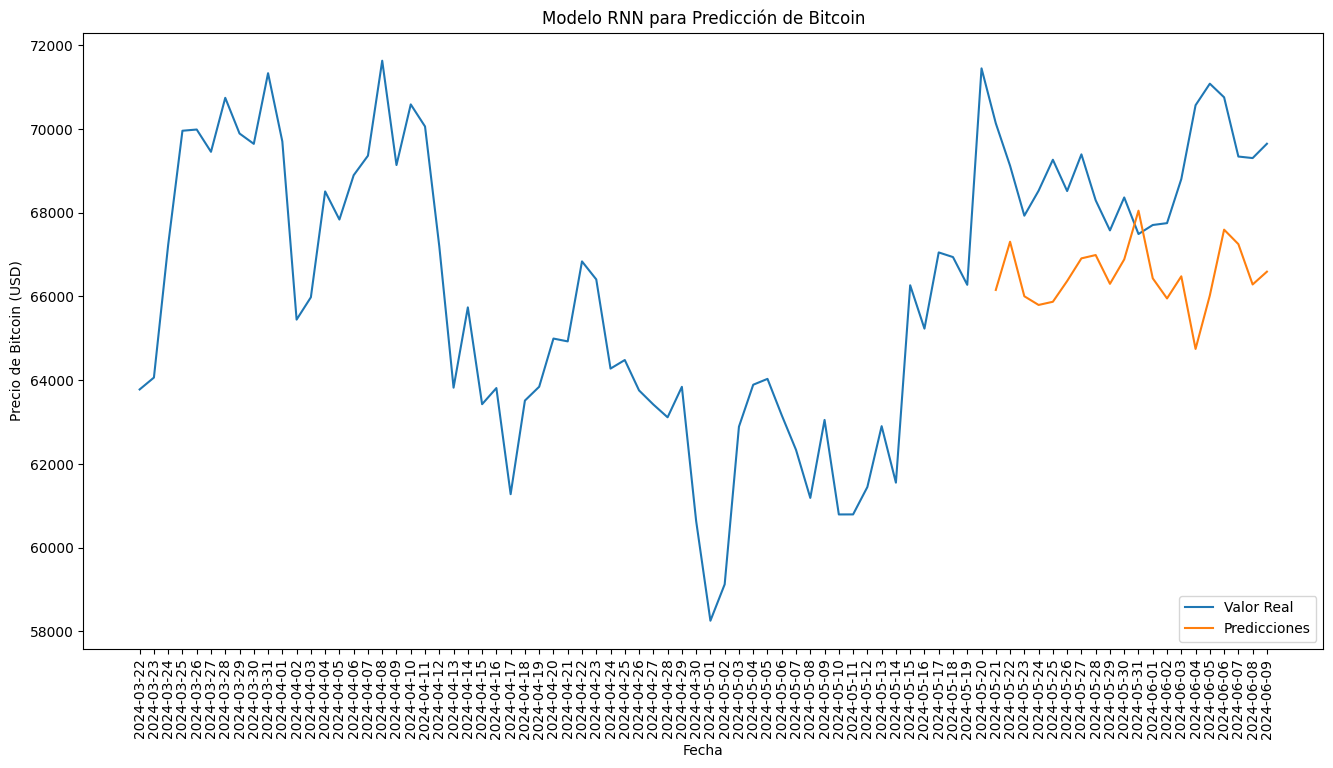

In [ ]:
import matplotlib.pyplot as plt  # Grafica
import numpy as np  # Manejo vectores

valid = df[split:]  # Filtra datos validación
valid = valid.reset_index(drop=True)  # Reinicia índice
valid['Predictions'] = np.nan  # Crea columna vacía

valid.loc[window_size:, 'Predictions'] = predictions  # Inserta predicciones
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()  # Formato fecha

plt.figure(figsize=(16, 8))  # Tamaño figura
plt.title('Modelo RNN para Predicción de Bitcoin')  # Título
plt.xlabel('Fecha')  # Etiqueta eje X
plt.ylabel('Precio de Bitcoin (USD)')  # Etiqueta eje Y
plt.plot(dates_valid, valid[['close', 'Predictions']])  # Grafica real y predicho
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')  # Leyenda
plt.xticks(rotation=90)  # Rotar fechas
plt.show()  # Muestra gráfico

In [ ]:
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10
for _ in range(days): #Dias que va pronosticar
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
last_date = df['timeOpen'].iloc[-1]  # Fecha mas reciente de datos reales
future_dates = pd.date_range(start=last_date, periods=days)[1:]  # genera 10 días posteriores
future_dates = future_dates.strftime('%Y-%m-%d').tolist()  # convierte a lista de cadenas año, mes dia

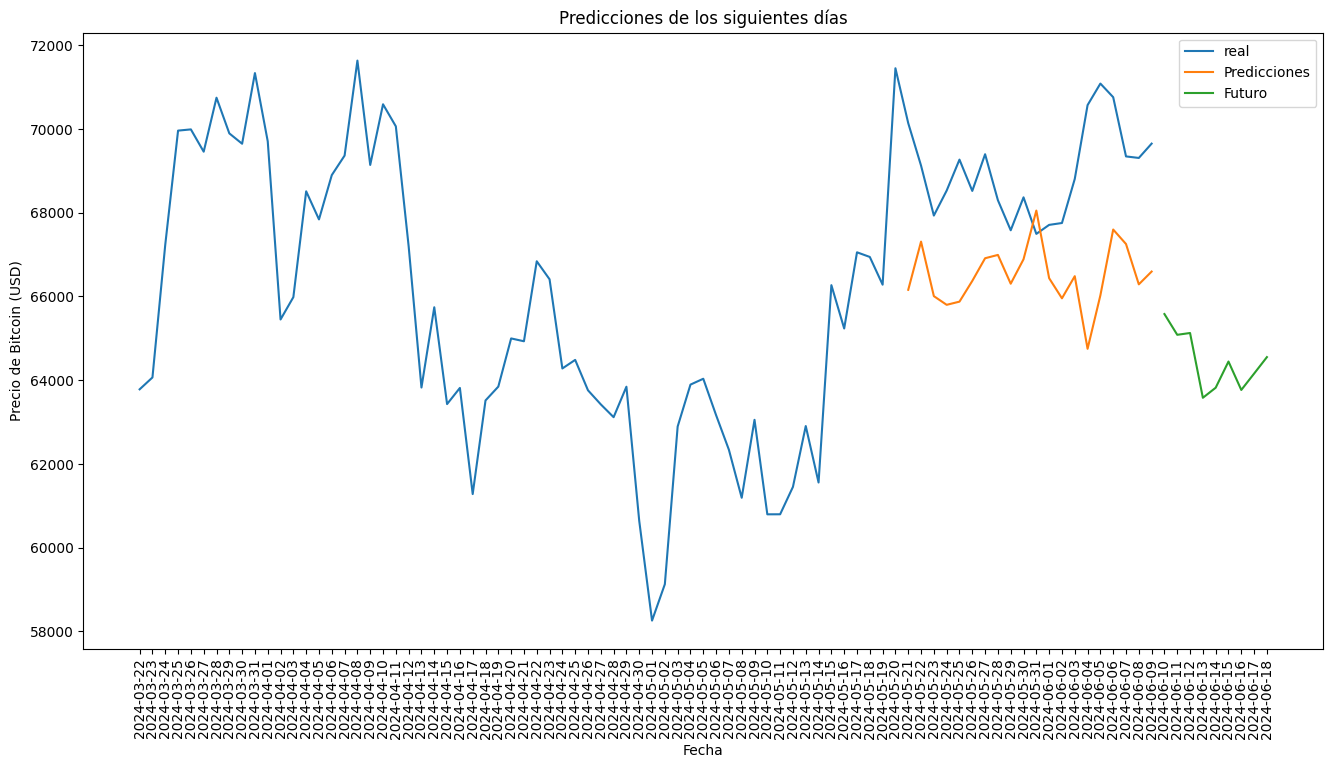

In [ ]:
plt.figure(figsize=(16, 8))  # Figura 16,8
plt.title('Predicciones de los siguientes días')  # Título
plt.xlabel('Fecha')  # eje X
plt.ylabel('Precio de Bitcoin (USD)')  # eje Y
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])  # histórico + ajuste
plt.plot(future_dates, future_predictions[:-1], label='Futuro')  # próximos 9 días
plt.legend()  # leyenda
plt.xticks(rotation=90)  # fechas rotadas
plt.show()  # Gráfico